##1. Load Dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("somesh24/spambase")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'spambase' dataset.
Path to dataset files: /kaggle/input/spambase


In [ ]:
import os

# List all files in the dataset folder
print(os.listdir(path))


['spambase_csv.csv']


In [ ]:
import pandas as pd

df = pd.read_csv(os.path.join(path, 'spambase_csv.csv'))  # adjust name if needed
print(df.head())


   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_%3B  char_freq_%28  \
0             0.00            0.00  ...           0.00          0.0

In [ ]:
print(df.shape)
print(df.dtypes)


(4601, 58)
word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
w

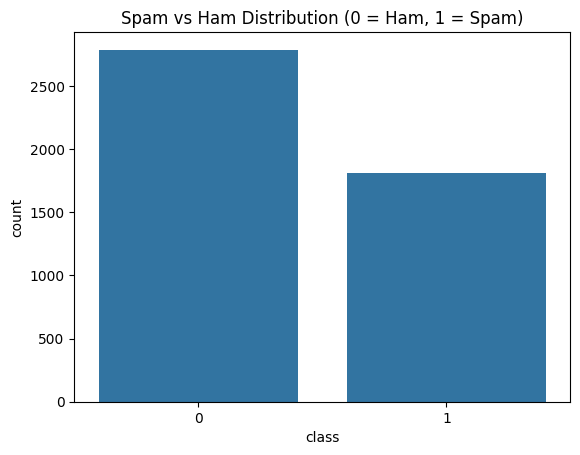

Missing values: 0
----- Naive Bayes -----
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       558
           1       0.81      0.87      0.84       363

    accuracy                           0.87       921
   macro avg       0.86      0.87      0.86       921
weighted avg       0.87      0.87      0.87       921



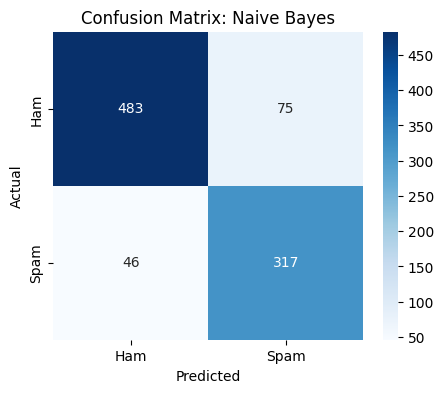

----- K-Nearest Neighbors -----
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       558
           1       0.89      0.88      0.88       363

    accuracy                           0.91       921
   macro avg       0.90      0.90      0.90       921
weighted avg       0.91      0.91      0.91       921



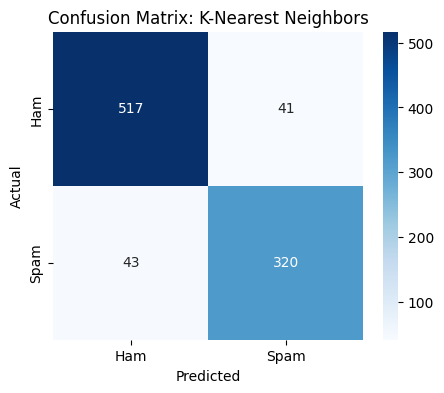

----- Logistic Regression -----
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       558
           1       0.93      0.89      0.91       363

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.93       921
weighted avg       0.93      0.93      0.93       921



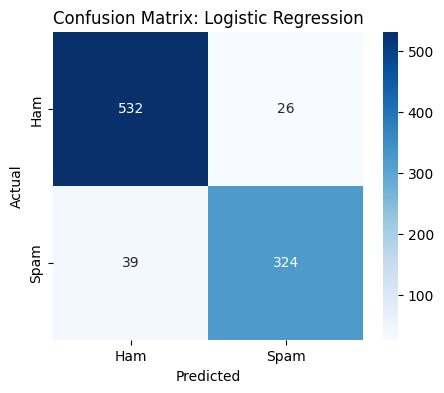

----- Decision Tree -----
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       558
           1       0.81      0.87      0.84       363

    accuracy                           0.87       921
   macro avg       0.86      0.87      0.86       921
weighted avg       0.87      0.87      0.87       921



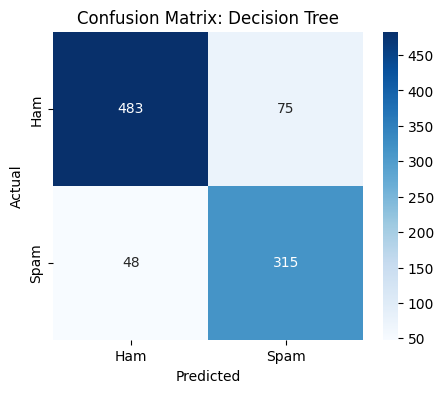

----- Random Forest -----
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       558
           1       0.91      0.89      0.90       363

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921



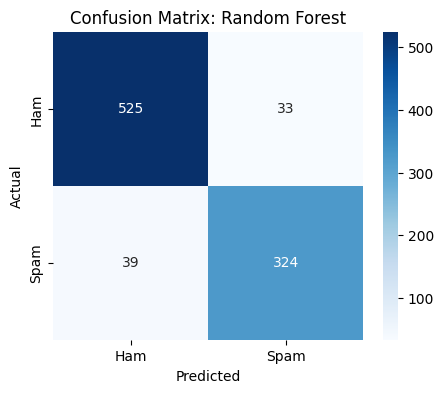

----- Gradient Boosting -----
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       558
           1       0.90      0.89      0.89       363

    accuracy                           0.92       921
   macro avg       0.91      0.91      0.91       921
weighted avg       0.92      0.92      0.92       921



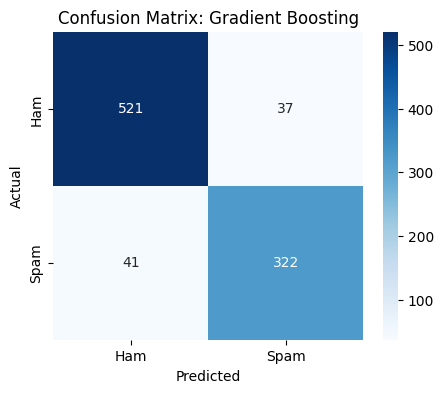

----- SVM -----
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       558
           1       0.93      0.88      0.91       363

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.92       921
weighted avg       0.93      0.93      0.93       921



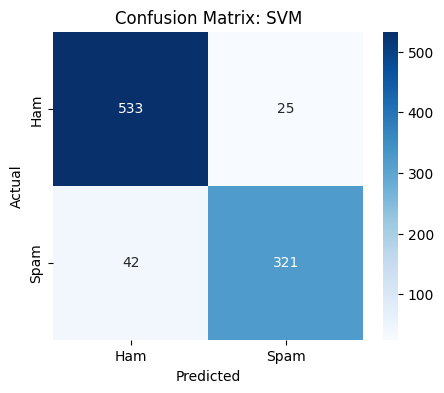


Summary of Classifier Performance:

            Classifier  Accuracy  Precision    Recall  F1-score
2  Logistic Regression  0.929425   0.925714  0.892562  0.908836
6                  SVM  0.927253   0.927746  0.884298  0.905501
4        Random Forest  0.921824   0.907563  0.892562  0.900000
5    Gradient Boosting  0.915309   0.896936  0.887052  0.891967
1  K-Nearest Neighbors  0.908795   0.886427  0.881543  0.883978
0          Naive Bayes  0.868621   0.808673  0.873278  0.839735
3        Decision Tree  0.866450   0.807692  0.867769  0.836653


In [ ]:
## 1. Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Features and Labels
X = df.drop('class', axis=1)
y = df['class']

# Check class distribution
sns.countplot(x=y)
plt.title("Spam vs Ham Distribution (0 = Ham, 1 = Spam)")
plt.show()

# Check missing values
print("Missing values:", X.isnull().sum().sum())

## 3. Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 4. Apply PCA
pca = PCA(n_components=0.95)  # retain 95% variance
X_pca = pca.fit_transform(X_scaled)

## 5. Split Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, stratify=y, random_state=42
)

## 6. Define Classifiers
classifiers = {
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True)
}

## 7. Train, Evaluate, and Plot Confusion Matrices
results = []

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, acc, prec, rec, f1])

    print(f"----- {name} -----")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {name}')
    plt.show()

## 8. Summary Table
results_df = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-score'])
print("\nSummary of Classifier Performance:\n")
print(results_df.sort_values(by='F1-score', ascending=False))


In [ ]:
train_path = '/content/drive/MyDrive/Docs/archive/train.csv'
df = pd.read_csv(train_path)

----- Linear Regression -----
MAE: 23003.81, MSE: 1440613278.75, R²: 0.3738


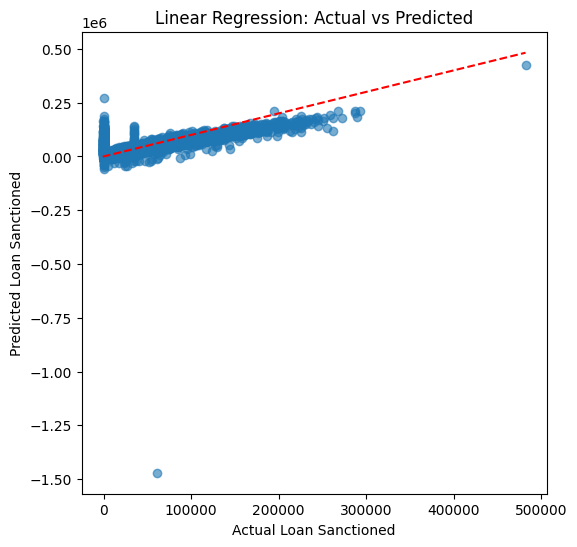

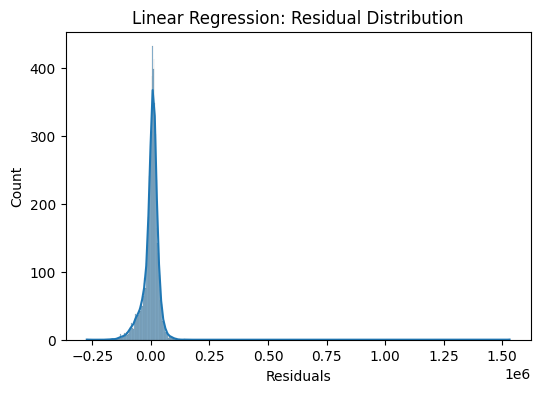

----- Ridge Regression -----
MAE: 23003.58, MSE: 1439755573.62, R²: 0.3742


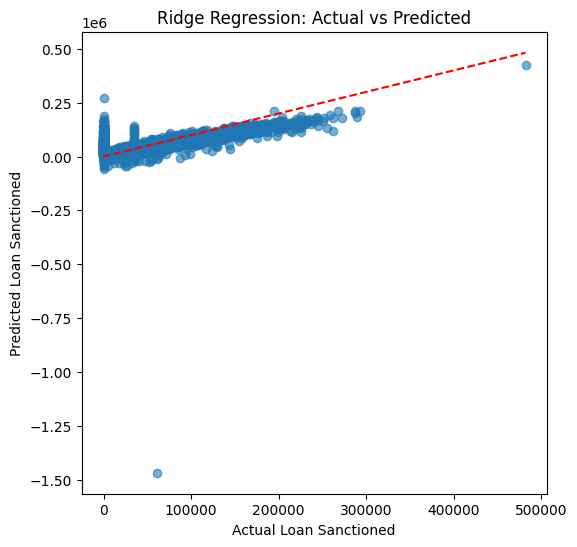

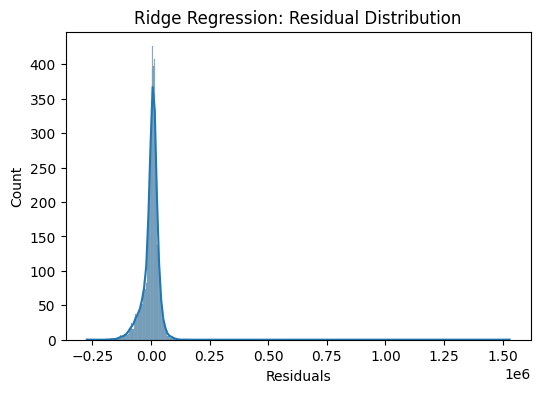

----- Lasso Regression -----
MAE: 23003.24, MSE: 1438717324.30, R²: 0.3746


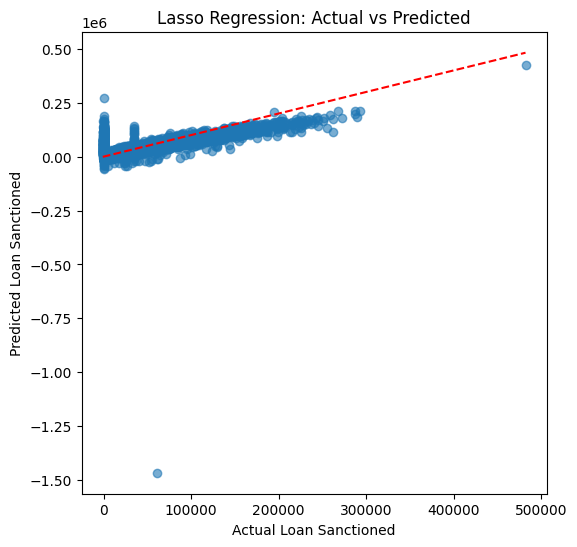

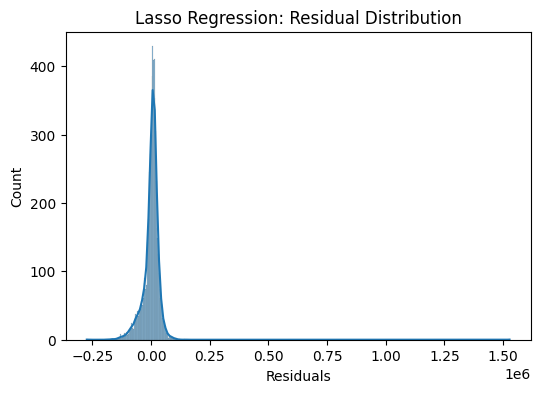

----- ElasticNet -----
MAE: 23630.71, MSE: 1094052374.99, R²: 0.5244


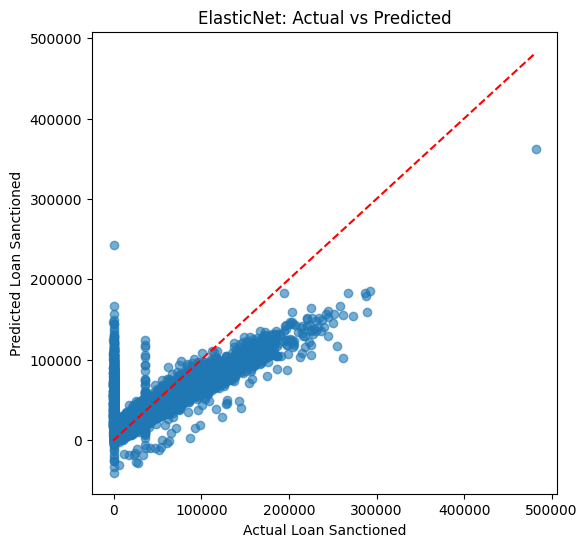

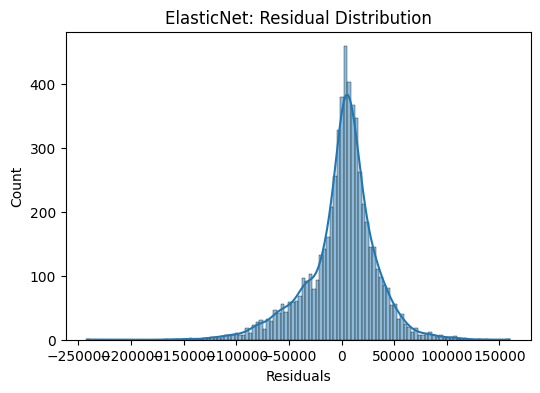

----- Decision Tree -----
MAE: 25996.73, MSE: 1892481443.98, R²: 0.1774


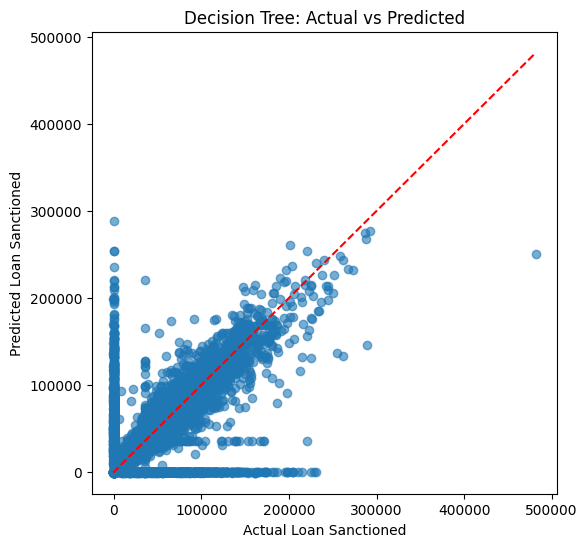

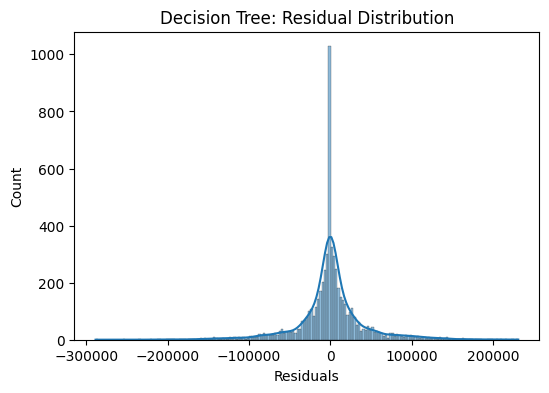

----- Random Forest -----
MAE: 21127.23, MSE: 1003895771.62, R²: 0.5636


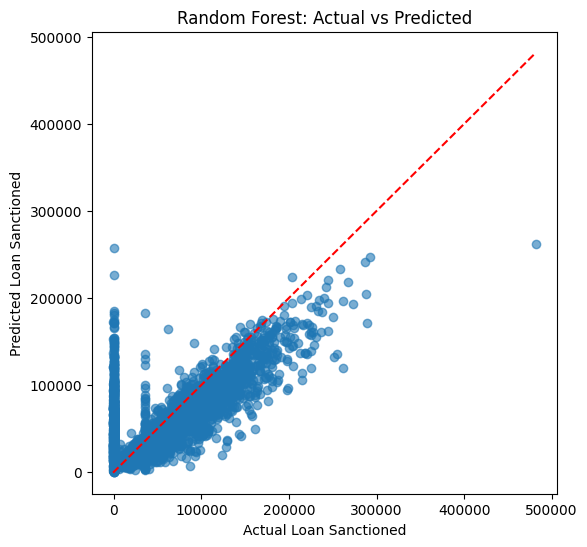

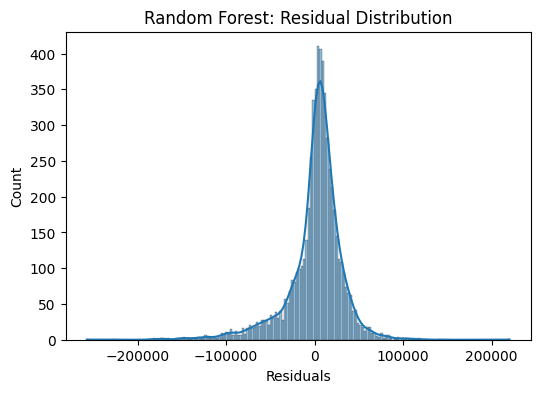

----- Gradient Boosting -----
MAE: 21386.51, MSE: 999942997.28, R²: 0.5653


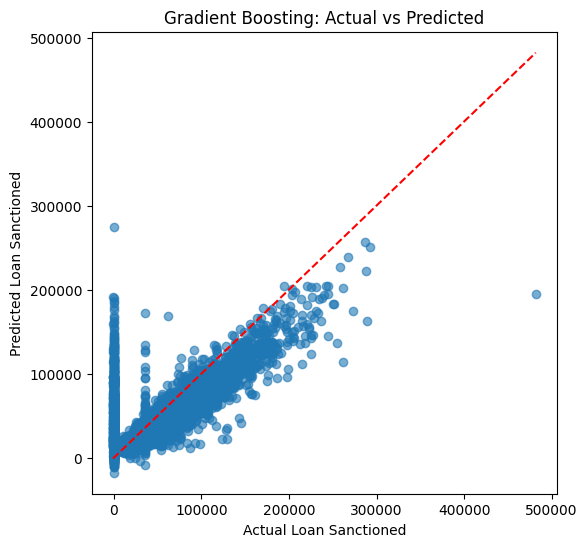

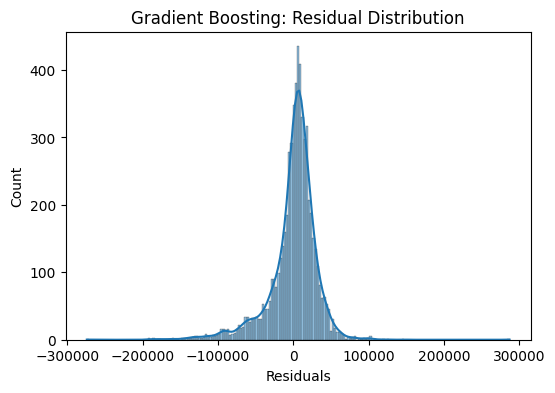

----- KNN Regressor -----
MAE: 24686.28, MSE: 1263139460.13, R²: 0.4509


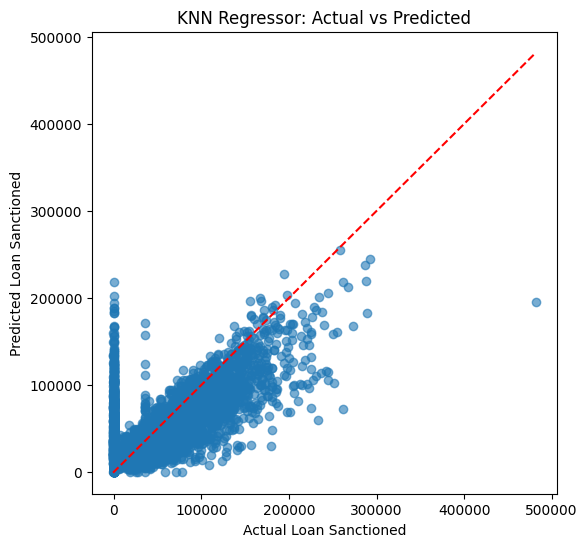

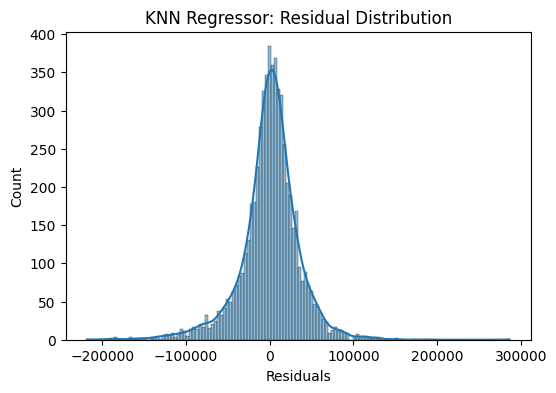

----- SVR -----
MAE: 36381.87, MSE: 2415185767.48, R²: -0.0498


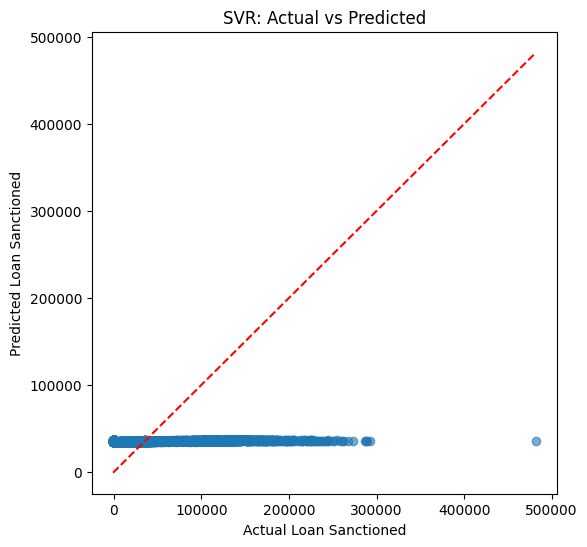

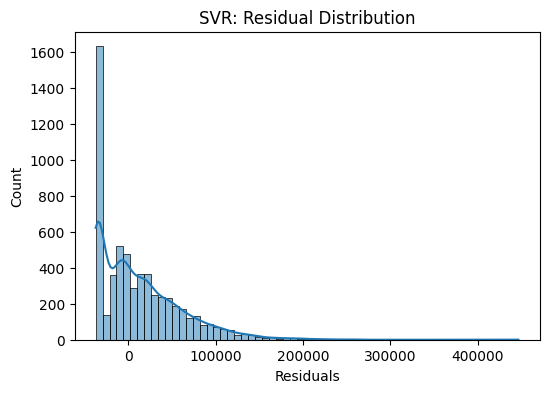


Summary of Regressor Performance:

           Regressor           MAE           MSE        R²
6  Gradient Boosting  21386.509227  9.999430e+08  0.565348
5      Random Forest  21127.234983  1.003896e+09  0.563630
3         ElasticNet  23630.705591  1.094052e+09  0.524441
7      KNN Regressor  24686.278935  1.263139e+09  0.450942
2   Lasso Regression  23003.244532  1.438717e+09  0.374623
1   Ridge Regression  23003.577878  1.439756e+09  0.374171
0  Linear Regression  23003.811776  1.440613e+09  0.373799
4      Decision Tree  25996.732272  1.892481e+09  0.177382
8                SVR  36381.868893  2.415186e+09 -0.049826


In [ ]:
## 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


## 3. Handle missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

## 4. Encode categorical columns
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

## 5. Feature / Target split
target = 'Loan Sanction Amount (USD)'
X = df.drop(columns=[target])
y = df[target]

## 6. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 7. Apply PCA
pca = PCA(n_components=0.95)  # retain 95% variance
X_pca = pca.fit_transform(X_scaled)

## 8. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

## 9. Define regression models
regressors = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "KNN Regressor": KNeighborsRegressor(),
    "SVR": SVR()
}

## 10. Train, evaluate, and visualize
results = []

for name, model in regressors.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append([name, mae, mse, r2])

    print(f"----- {name} -----")
    print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.4f}")

    # Plot Actual vs Predicted
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Loan Sanctioned")
    plt.ylabel("Predicted Loan Sanctioned")
    plt.title(f"{name}: Actual vs Predicted")
    plt.show()

    # Optional: Residual plot
    residuals = y_test - y_pred
    plt.figure(figsize=(6,4))
    sns.histplot(residuals, kde=True)
    plt.title(f"{name}: Residual Distribution")
    plt.xlabel("Residuals")
    plt.show()

## 11. Summary table
results_df = pd.DataFrame(results, columns=['Regressor', 'MAE', 'MSE', 'R²'])
print("\nSummary of Regressor Performance:\n")
print(results_df.sort_values(by='R²', ascending=False))


In [ ]:
!apt-get install pandoc -y

!jupyter nbconvert --to latex "/content/drive/MyDrive/Colab Notebooks/ML6.ipynb"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/ML6.ipynb to latex
[NbConvertApp] Support files will be in ML6_files/
[NbConvertApp] Making directory /content/drive/MyDrive/Colab Notebooks/ML6_files
[NbConvertApp] Writing 70561 bytes to /content/drive/MyDrive/Colab Notebooks/ML6.tex


In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/Colab Notebooks/ML6.tex')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import shutil
from google.colab import files

# 1. Zip the folder
shutil.make_archive('/content/ML6_files', 'zip', '/content/drive/MyDrive/Colab Notebooks/ML6_files')

# 2. Download the zip
files.download('/content/ML6_files.zip')
